**Importing the essential libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as stat

In [3]:
cpy = pd.read_csv('Company.csv')
cpy_tweet = pd.read_csv('Company_Tweet.csv')
tweet = pd.read_csv('Tweet.csv')

**Inspecting the dataframes**

In [4]:
cpy

,ticker_symbol,company_name
0,AAPL,apple
1,GOOG,Google Inc
2,GOOGL,Google Inc
3,AMZN,Amazon.com
4,TSLA,Tesla Inc
5,MSFT,Microsoft


In [5]:
cpy_tweet

,tweet_id,ticker_symbol
0,550803612197457920,AAPL
1,550803610825928706,AAPL
2,550803225113157632,AAPL
3,550802957370159104,AAPL
4,550802855129382912,AAPL
...,...,...
4336440,1212158772015034369,TSLA
4336441,1212159099632267268,TSLA
4336442,1212159184931717120,TSLA
4336443,1212159838882533376,TSLA


In [6]:
tweet

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1
...,...,...,...,...,...,...,...
3717959,1212159765914079234,TEEELAZER,1577836383,That $SPY $SPX puuump in the last hour was the...,1,0,6
3717960,1212159838882533376,ShortingIsFun,1577836401,In 2020 I may start Tweeting out positive news...,0,0,1
3717961,1212160015332728833,Commuternyc,1577836443,Patiently Waiting for the no twitter sitter tw...,0,0,5
3717962,1212160410692046849,MoriaCrypto,1577836537,I don't discriminate. I own both $aapl and $ms...,1,0,1


<h3>Mering Dateframes</h3>

In [7]:
tweets = pd.merge(tweet,cpy_tweet,on='tweet_id',how='inner')
tweets.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol
0,550441509175443456,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL
1,550441672312512512,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL
2,550441732014223360,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN
3,550442977802207232,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA
4,550443807834402816,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL


In [8]:
tweets['post_date'] = pd.to_datetime(tweets['post_date'], unit='s')

In [9]:
tweets['Date'] = pd.to_datetime(tweets['post_date'].apply(lambda date: date.date()))

In [10]:
tweets['Date'].head()

0   2015-01-01
1   2015-01-01
2   2015-01-01
3   2015-01-01
4   2015-01-01
Name: Date, dtype: datetime64[ns]

In [11]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4336445 entries, 0 to 4336444
Data columns (total 9 columns):
 #   Column         Dtype         
---  ------         -----         
 0   tweet_id       int64         
 1   writer         object        
 2   post_date      datetime64[ns]
 3   body           object        
 4   comment_num    int64         
 5   retweet_num    int64         
 6   like_num       int64         
 7   ticker_symbol  object        
 8   Date           datetime64[ns]
dtypes: datetime64[ns](2), int64(4), object(3)
memory usage: 330.8+ MB


<h3>Columns and rows with loss of data removed</h3>

In [12]:
tweets = tweets.drop(['tweet_id'],axis=1)

In [13]:
tweets.isna().sum()

writer           55919
post_date            0
body                 0
comment_num          0
retweet_num          0
like_num             0
ticker_symbol        0
Date                 0
dtype: int64

In [14]:
tweets.ticker_symbol.value_counts()

AAPL     1425013
TSLA     1096868
AMZN      718715
GOOG      392569
MSFT      375711
GOOGL     327569
Name: ticker_symbol, dtype: int64

In [23]:
aapl = tweets[tweets['ticker_symbol'] == 'AAPL']
tsla = tweets[tweets['ticker_symbol'] == 'TSLA']
amzn = tweets[tweets['ticker_symbol'] == 'AMZN']
msft = tweets[tweets['ticker_symbol'] == 'MSFT']
goog = tweets[tweets['ticker_symbol'] == 'GOOG']
googl = tweets[tweets['ticker_symbol'] == 'GOOGL'] ## With stockholders voting rights

In [16]:
!pip install yfinance

<h3>Importing Stock data</h3>

In [16]:
import yfinance as yf

In [17]:
tsla_stock = yf.Ticker('TSLA')

In [19]:
start = min(tsla['Date'])
end = max(tsla['Date'])

tsla_stock = tsla_stock.history(start=start.date(), end=end.date())

In [20]:
tsla_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-12-31,44.618000,45.136002,44.450001,44.481998,11487500,0,0
2015-01-02,44.574001,44.650002,42.652000,43.862000,23822000,0,0
2015-01-05,42.910000,43.299999,41.431999,42.018002,26842500,0,0
2015-01-06,42.012001,42.840000,40.841999,42.256001,31309500,0,0
2015-01-07,42.669998,42.956001,41.956001,42.189999,14842000,0,0
...,...,...,...,...,...,...,...
2019-12-23,82.356003,84.402000,82.000000,83.844002,66598000,0,0
2019-12-24,83.671997,85.094002,82.538002,85.050003,40273500,0,0
2019-12-26,85.582001,86.695999,85.269997,86.188004,53169500,0,0


In [22]:
aapl_stock = yf.Ticker("AAPL").history(start=min(aapl['Date']).date(),end=max(aapl['Date']).date())
amzn_stock = yf.Ticker("AMZN").history(start=min(amzn['Date']).date(),end=max(amzn['Date']).date())
googl_stock = yf.Ticker("GOOGL").history(start=min(googl['Date']).date(),end=max(googl['Date']).date())
msft_stock = yf.Ticker("MSFT").history(start=min(msft['Date']).date(),end=max(msft['Date']).date())

In [22]:
aapl_stock

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2014-12-31,25.466022,25.535996,24.876886,24.915258,165613600,0.0,0
2015-01-02,25.143239,25.154526,24.231320,24.678251,212818400,0.0,0
2015-01-05,24.443497,24.524757,23.793417,23.983023,257142000,0.0,0
2015-01-06,24.048483,24.249376,23.617352,23.985281,263188400,0.0,0
2015-01-07,24.197458,24.423180,24.084596,24.321606,160423600,0.0,0
...,...,...,...,...,...,...,...
2019-12-23,68.916824,69.830704,68.877517,69.769287,98572000,0.0,0
2019-12-24,69.938777,69.987914,69.503950,69.835594,48478800,0.0,0
2019-12-26,69.970727,71.238367,69.941248,71.221169,93121200,0.0,0


<h3>Merging datasets</h3>

In [24]:
teslatweets = pd.merge(tweets,tsla_stock,on='Date',how='inner')
teslatweets.head()

,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,DozenStocks,2015-01-02 00:01:54,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,1,AMZN,2015-01-02,44.574001,44.650002,42.652,43.862,23822000,0,0
1,arianerandolph,2015-01-02 00:03:21,Will Audi's Electric Q7 Cause $TSLA Model X Ba...,0,0,0,TSLA,2015-01-02,44.574001,44.650002,42.652,43.862,23822000,0,0
2,TMFJMo,2015-01-02 00:04:43,Either way you're a winnah. RT @dbbrakebill: i...,0,0,1,AAPL,2015-01-02,44.574001,44.650002,42.652,43.862,23822000,0,0
3,Weeklyoptions,2015-01-02 00:05:14,@Weeklyoptions http://Weeklyoptionplays.com we...,0,0,1,AAPL,2015-01-02,44.574001,44.650002,42.652,43.862,23822000,0,0
4,TMFJMo,2015-01-02 00:08:02,"Cash flow machine. RT @themandotcom: $MSFT, wh...",0,0,0,MSFT,2015-01-02,44.574001,44.650002,42.652,43.862,23822000,0,0


In [ ]:
Amazontweets = pd.merge(tweets,tsla_stock,on='Date',how='inner')
Amazontweets.head()

In [66]:
def tweet_vol_affect(tweets,stocks,title):
    tweet_shift1 = tweets.groupby('Date').size().shift(-1).dropna() #number of tweets
    stock_data = stocks['Volume'].dropna()#total number of shares that have been bought or sold
    
    corr, pval = stat.spearmanr(tweet_shift1.reindex(stock_data.index), stock_data,nan_policy='omit')
    tweets_vol = tweets.groupby('Date').size().rolling(30).mean().dropna()#month
    stocks_data = stocks['Volume'].rolling(30).mean().dropna()#month
    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot()
    ax2 = fig.add_subplot()
    ax2 = ax1.twinx()
    ax1.plot(tweets_vol.index,tweets_vol,label='Tweet Volume')
    ax2.plot(stocks_data.index,stocks_data,color='orange',label='Trade Volume')
    ax2.set_title(title+" \n Spearman correlation: corr={0:.5f} pval={1:.5f}".format(corr,pval))
    
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    plt.show()
    
  

<ipython-input-66-0fbfde3736ea>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


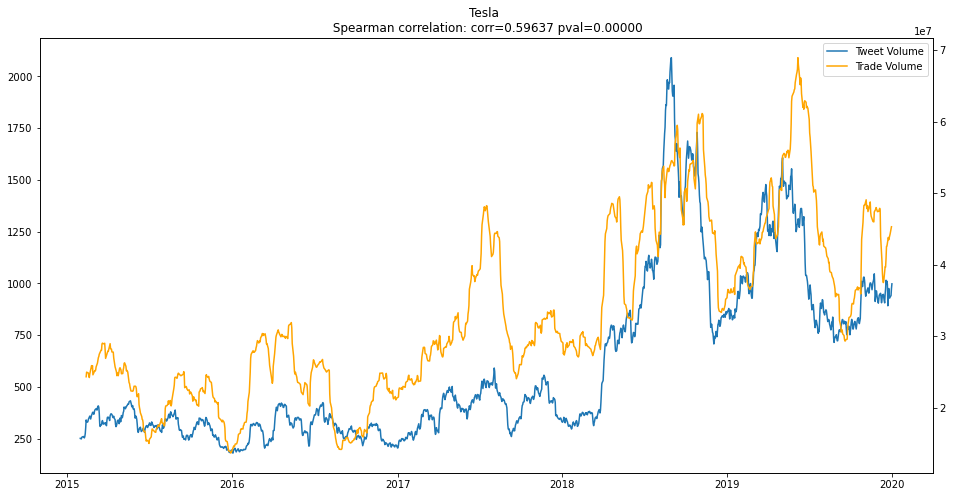

In [67]:
tweet_vol_affect(tsla,tsla_stock,"Tesla")    

<ipython-input-66-0fbfde3736ea>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


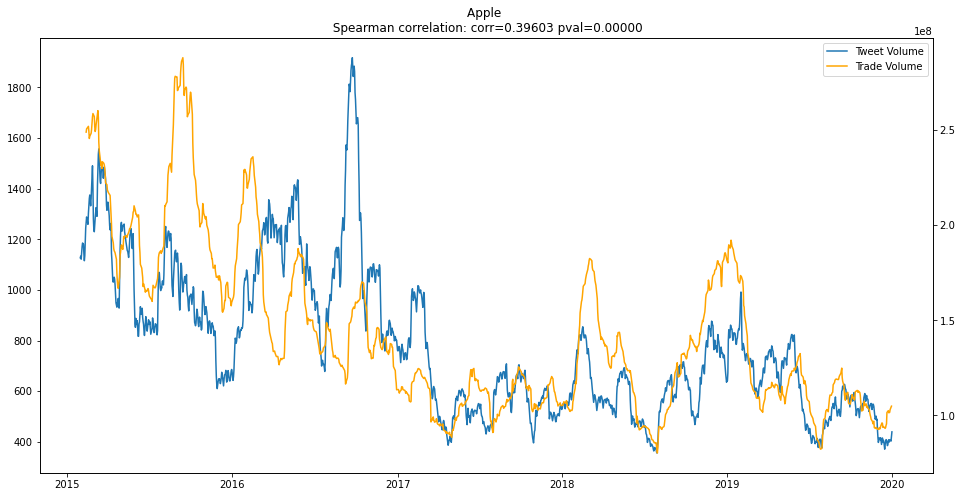

In [68]:
tweet_vol_affect(aapl,aapl_stock,"Apple")

<ipython-input-66-0fbfde3736ea>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


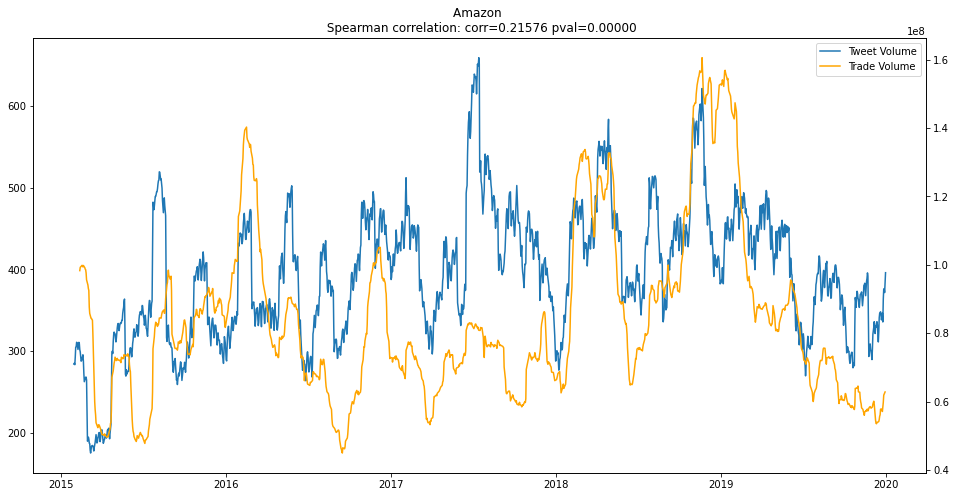

In [69]:
tweet_vol_affect(amzn,amzn_stock,"Amazon")


<ipython-input-66-0fbfde3736ea>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


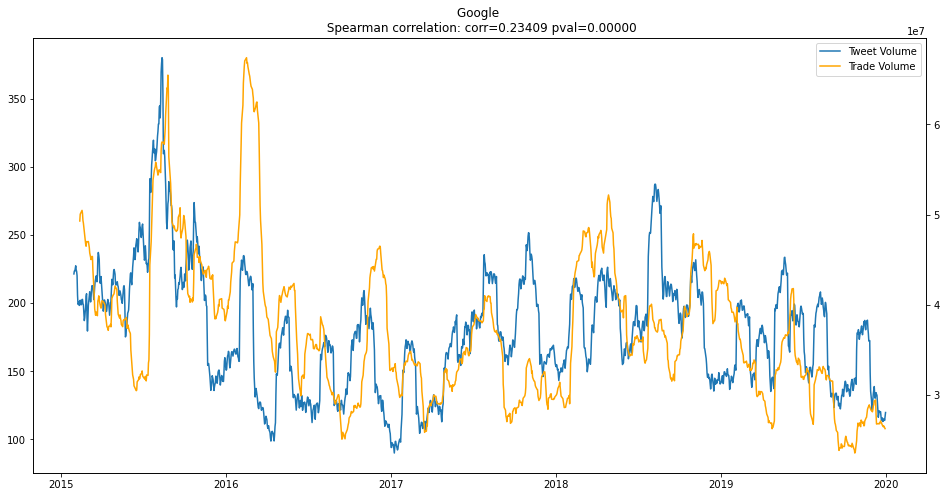

In [70]:
tweet_vol_affect(googl,googl_stock,"Google")

<ipython-input-66-0fbfde3736ea>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


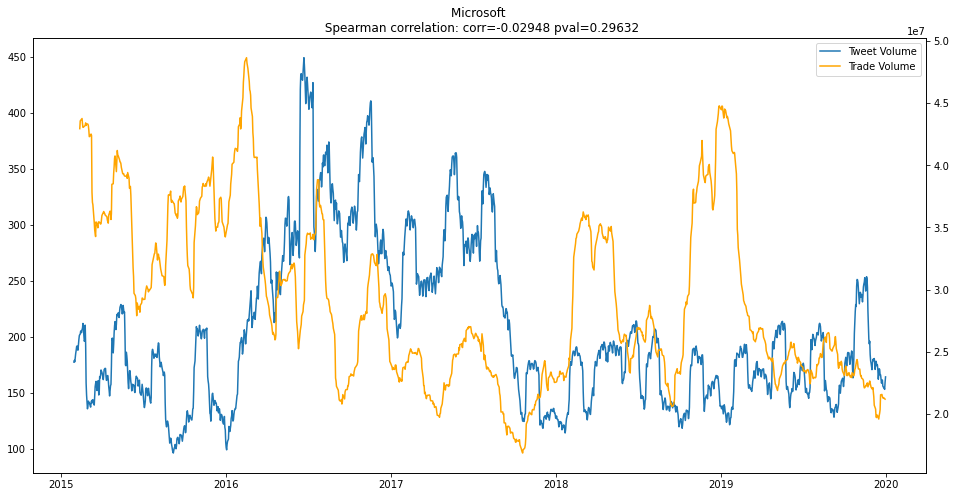

In [71]:
tweet_vol_affect(msft,msft_stock,"Microsoft")

# **Classifying positive and negative tweets**

In [35]:
from afinn import Afinn
afinn = Afinn()

In [36]:
tsla['score'] =  tsla['body'].apply(lambda tweet: afinn.score(tweet))
aapl['score'] =  aapl['body'].apply(lambda tweet: afinn.score(tweet))
amzn['score'] =  amzn['body'].apply(lambda tweet: afinn.score(tweet))
msft['score'] =  msft['body'].apply(lambda tweet: afinn.score(tweet))
googl['score'] =  googl['body'].apply(lambda tweet: afinn.score(tweet))

<ipython-input-36-0493c20c1d50>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tsla['score'] =  tsla['body'].apply(lambda tweet: afinn.score(tweet))
<ipython-input-36-0493c20c1d50>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl['score'] =  aapl['body'].apply(lambda tweet: afinn.score(tweet))
<ipython-input-36-0493c20c1d50>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the doc

In [37]:
tsla

,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,Date,score
3,ShowDreamCar,2015-01-01 00:06:47,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,TSLA,2015-01-01,0.0
5,i_Know_First,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,2015-01-01,0.0
7,aaplstocknews,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,2015-01-01,0.0
9,iknowfirst,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,2015-01-01,0.0
11,Cprediction,2015-01-01 00:10:16,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,TSLA,2015-01-01,0.0
...,...,...,...,...,...,...,...,...,...
4336432,StockJoke,2019-12-31 23:49:06,"I'm getting wasted on NYE, and thanks to @NHTS...",0,0,0,TSLA,2019-12-31,2.0
4336434,sweetog76,2019-12-31 23:50:24,$TSLA Very Interesting dude:,0,0,0,TSLA,2019-12-31,2.0
4336436,MelaynaLokosky,2019-12-31 23:50:45,If only 2020 brought more self-awareness to Te...,0,1,0,TSLA,2019-12-31,0.0
4336440,ShortingIsFun,2019-12-31 23:53:21,In 2020 I may start Tweeting out positive news...,0,0,1,TSLA,2019-12-31,-3.0


In [38]:
aapl

,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,Date,score
0,VisualStockRSRC,2015-01-01 00:00:57,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,AAPL,2015-01-01,2.0
1,KeralaGuy77,2015-01-01 00:01:36,Insanity of today weirdo massive selling. $aap...,0,0,0,AAPL,2015-01-01,-3.0
4,i_Know_First,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,0.0
6,aaplstocknews,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,0.0
8,iknowfirst,2015-01-01 00:10:05,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,AAPL,2015-01-01,0.0
...,...,...,...,...,...,...,...,...,...
4336437,QuantWolfLine,2019-12-31 23:51:01,Imagine calling your broker-dealer and wanting...,1,0,1,AAPL,2019-12-31,3.0
4336438,GMGRIFF_79,2019-12-31 23:51:06,"$AAPL yearly~ Heck of a year.. Jan. 2, 1999~ar...",0,0,1,AAPL,2019-12-31,2.0
4336439,TEEELAZER,2019-12-31 23:53:03,That $SPY $SPX puuump in the last hour was the...,1,0,6,AAPL,2019-12-31,-1.0
4336442,MoriaCrypto,2019-12-31 23:55:37,I don't discriminate. I own both $aapl and $ms...,1,0,1,AAPL,2019-12-31,-2.0


In [39]:
msft

,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,Date,score
19,GetAOM,2015-01-01 00:11:17,$UNP $ORCL $QCOM $MSFT $AAPL Top scoring mega ...,0,0,0,MSFT,2015-01-01,2.0
43,BoilerWarrior,2015-01-01 00:55:58,"http://StockAviator.com....Top penny stocks, N...",0,0,0,MSFT,2015-01-01,2.0
46,StocksThatDoubl,2015-01-01 00:56:05,Want alerts for momentum stocks about to run? ...,0,0,0,MSFT,2015-01-01,1.0
75,The_Dumb_Money,2015-01-01 01:42:01,"IMHO, $MSFT shockingly remains MILDLY undervalued",1,0,0,MSFT,2015-01-01,0.0
82,UnderGradStocks,2015-01-01 01:49:38,@CNNMoney I like $MSFT with him in charge. He ...,0,0,0,MSFT,2015-01-01,3.0
...,...,...,...,...,...,...,...,...,...
4336395,SentimEntropy,2019-12-31 23:00:03,Notable activity on social media recently for$...,0,0,0,MSFT,2019-12-31,2.0
4336402,RegularWIGuy,2019-12-31 23:11:23,"$AAPL $MSFT $JPM - Apple, Microsoft top Dow 20...",0,0,0,MSFT,2019-12-31,2.0
4336406,harveyrosenblum,2019-12-31 23:13:22,If this continues then the market will be enti...,0,0,2,MSFT,2019-12-31,0.0
4336419,TheUnicornBay,2019-12-31 23:32:02,"Btw, Estimated #Earnings Per Share for $MSFT i...",0,0,0,MSFT,2019-12-31,1.0


In [40]:
amzn

,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,Date,score
2,DozenStocks,2015-01-01 00:01:50,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,AMZN,2015-01-01,0.0
27,JorelLaraKalel,2015-01-01 00:26:09,Top 10 searched #stocks of #2014 $AAPL $FB $BA...,0,0,2,AMZN,2015-01-01,2.0
37,jakubhajost,2015-01-01 00:47:17,RT @SeekingAlpha: A Look At BlackBerry's Deals...,0,0,0,AMZN,2015-01-01,0.0
38,WSJ,2015-01-01 00:49:05,Jeff Bezos lost $7.4 billion in Amazon's worst...,21,139,57,AMZN,2015-01-01,-6.0
39,GillesKLEIN,2015-01-01 00:50:10,Jeff Bezos lost $7.4 billion in #Amazon worst ...,1,2,1,AMZN,2015-01-01,-6.0
...,...,...,...,...,...,...,...,...,...
4336418,thequ4nt,2019-12-31 23:31:28,"[Yahoo Finance Video - December 31, 2019] $AMZ...",0,1,1,AMZN,2019-12-31,2.0
4336424,DentonBlackwell,2019-12-31 23:35:01,@Ryzenn $AAPL has to have a lights out ER to k...,0,0,1,AMZN,2019-12-31,0.0
4336428,ITRADEVOL,2019-12-31 23:41:10,Is there a public database or website where I ...,0,0,2,AMZN,2019-12-31,6.0
4336430,naashonomics,2019-12-31 23:43:26,$FB $AMZN $GOOGL $NFLX #FANG 2019,0,0,0,AMZN,2019-12-31,0.0


In [41]:
googl

,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,Date,score
30,UPBOptionMil,2015-01-01 00:26:44,2014 The Year in Review (Part II - THE END) ht...,0,2,2,GOOGL,2015-01-01,0.0
59,t_nathan95,2015-01-01 01:20:36,Prediction: $TWTR $GRPN $YELP are acquired as ...,0,0,1,GOOGL,2015-01-01,3.0
62,t_nathan95,2015-01-01 01:25:02,Prediction: PayPal post-spinoff and $PAY are n...,0,0,0,GOOGL,2015-01-01,-3.0
72,PBratbyOfficial,2015-01-01 01:40:14,Trailing Stop taken out on my $GOOGL #trade ta...,0,0,0,GOOGL,2015-01-01,1.0
87,SentiQuant,2015-01-01 01:59:47,#SENTISHIFTUP $X $T $GOOGL $AMRN $UPIP $CNAT $...,0,0,0,GOOGL,2015-01-01,0.0
...,...,...,...,...,...,...,...,...,...
4336380,faang_gang,2019-12-31 22:46:18,$GOOGL also flat today,1,0,0,GOOGL,2019-12-31,0.0
4336405,harveyrosenblum,2019-12-31 23:13:22,If this continues then the market will be enti...,0,0,2,GOOGL,2019-12-31,0.0
4336409,luke_sosnowski,2019-12-31 23:15:21,Great day and years end over at #TRICKTRADES m...,1,2,7,GOOGL,2019-12-31,7.0
4336410,Flower_Power_67,2019-12-31 23:17:41,#FastMoneyEspressoFINAL TRADES:Steve Grasso —>...,0,1,4,GOOGL,2019-12-31,0.0


In [43]:
teslatweets = pd.merge(tsla,tsla_stock,on='Date',how='inner')
amazontweets = pd.merge(amzn,amzn_stock,on='Date',how='inner')
appletweets = pd.merge(aapl,aapl_stock,on='Date',how='inner')
microsofttweets = pd.merge(msft,msft_stock,on='Date',how='inner')
googletweets = pd.merge(googl,googl_stock,on='Date',how='inner')

In [44]:
teslatweets.head()

,writer,post_date,body,comment_num,retweet_num,like_num,ticker_symbol,Date,score,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,arianerandolph,2015-01-02 00:03:21,Will Audi's Electric Q7 Cause $TSLA Model X Ba...,0,0,0,TSLA,2015-01-02,0.0,44.574001,44.650002,42.652,43.862,23822000,0,0
1,Scott_Klemke,2015-01-02 00:16:03,Tesla's next charger will automatically connec...,0,0,0,TSLA,2015-01-02,0.0,44.574001,44.650002,42.652,43.862,23822000,0,0
2,markbspiegel,2015-01-02 00:41:39,$TSLA December 2014 Netherlands sales 352 vs. ...,1,1,2,TSLA,2015-01-02,0.0,44.574001,44.650002,42.652,43.862,23822000,0,0
3,caroltheva,2015-01-02 00:46:30,Cost differences between #stocks and Options h...,0,0,0,TSLA,2015-01-02,0.0,44.574001,44.650002,42.652,43.862,23822000,0,0
4,dr973,2015-01-02 02:54:13,@TMFJMo Believe all this hype with $TSLA being...,0,0,0,TSLA,2015-01-02,0.0,44.574001,44.650002,42.652,43.862,23822000,0,0


In [45]:
teslatweets.to_csv('TeslaFinal.csv')
amazontweets.to_csv('AmazonFinal.csv')
appletweets.to_csv('AppleFinal.csv')
microsofttweets.to_csv('MicrosoftFinal.csv')
googletweets.to_csv('GoogleFinal.csv')

<h3>Merging sentiment score and stock data</h3>

In [79]:
df2 = amazontweets.groupby('Date')['score'].mean()
AmazonSentimentAndStock = pd.merge(df2,amzn_stock,on='Date',how='inner')

df3 = appletweets.groupby('Date')['score'].mean()
AppleSentimentAndStock = pd.merge(df3,aapl_stock,on='Date',how='inner')

df4 = microsofttweets.groupby('Date')['score'].mean()
MSSentimentAndStock = pd.merge(df4,msft_stock,on='Date',how='inner')
df5 = googletweets.groupby('Date')['score'].mean()
GoogleSentimentAndStock = pd.merge(df5,googl_stock,on='Date',how='inner')

In [80]:
TeslaSentimentAndStock.to_csv('TeslaSentimentAndStock.csv')
AmazonSentimentAndStock.to_csv('AmazonSentimentAndStock.csv')
AppleSentimentAndStock.to_csv('AppleSentimentAndStock.csv')
MSSentimentAndStock.to_csv('MSSentimentAndStock.csv')
GoogleSentimentAndStock.to_csv('GoogleSentimentAndStock.csv')

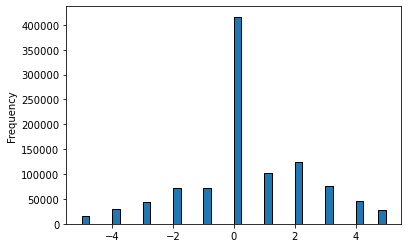

In [46]:
tsla.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black');

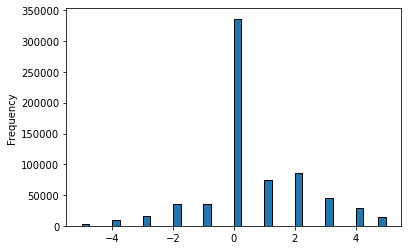

In [47]:
amzn.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black');

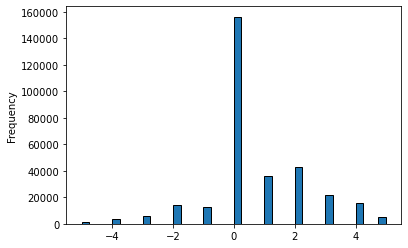

In [48]:
googl.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black');

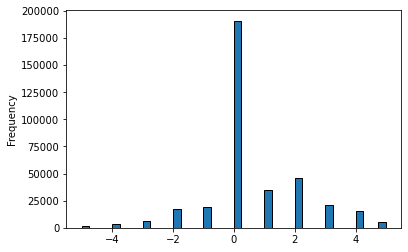

In [49]:
msft.score.plot(kind='hist',range=(-5,5),bins=40,edgecolor='black');

<h3>Method for colleration check and plotting</h3>

In [72]:
def sentiment_overtime(tweets,stock,title):
    visual= tweets.groupby('Date')['score'].mean().shift(-1).rolling(30).mean().dropna()
    corr_test = tweets.groupby('Date')['score'].mean().shift(-1).dropna()
    corr, pval = stat.spearmanr(corr_test.reindex(stock.index), stock['Close'],nan_policy='omit')

    fig = plt.figure(figsize=(16,8))
    ax1 = fig.add_subplot()
    ax2 = fig.add_subplot()
    ax2 = ax1.twinx()
    
    ax1.plot(visual.index,visual,label='Tweets Sentiment')
    ax2.plot(stock.index,stock['Close'],color='orange',label='share price')
    ax2.set_title("Effects of "+title+" tweets to shareprice" +"\n Spearman correlation: corr={0:.5f} pval={1:.5f}".format(corr,pval))
    lines, labels = ax1.get_legend_handles_labels()
    lines2, labels2 = ax2.get_legend_handles_labels()
    ax2.legend(lines + lines2, labels + labels2, loc=0)
    plt.show()
    

<ipython-input-72-10d90c04481c>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


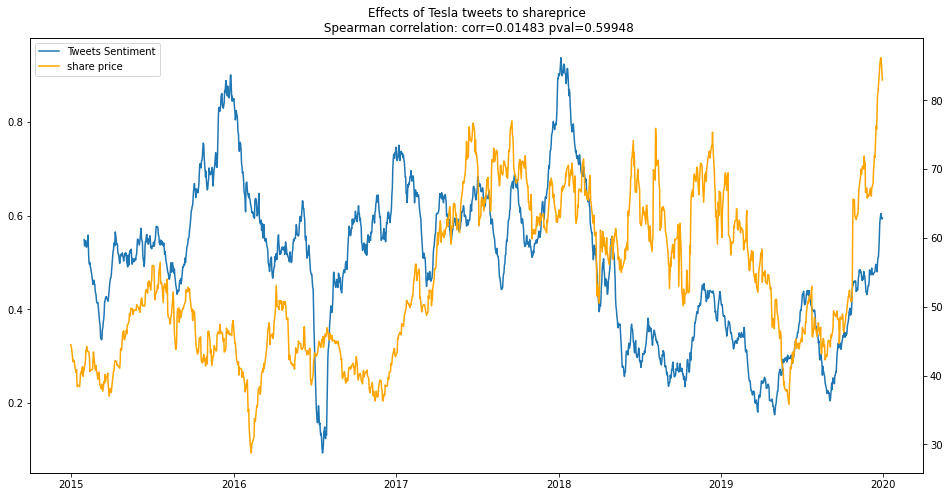

In [73]:
sentiment_overtime(tsla,tsla_stock,"Tesla");

<ipython-input-72-10d90c04481c>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


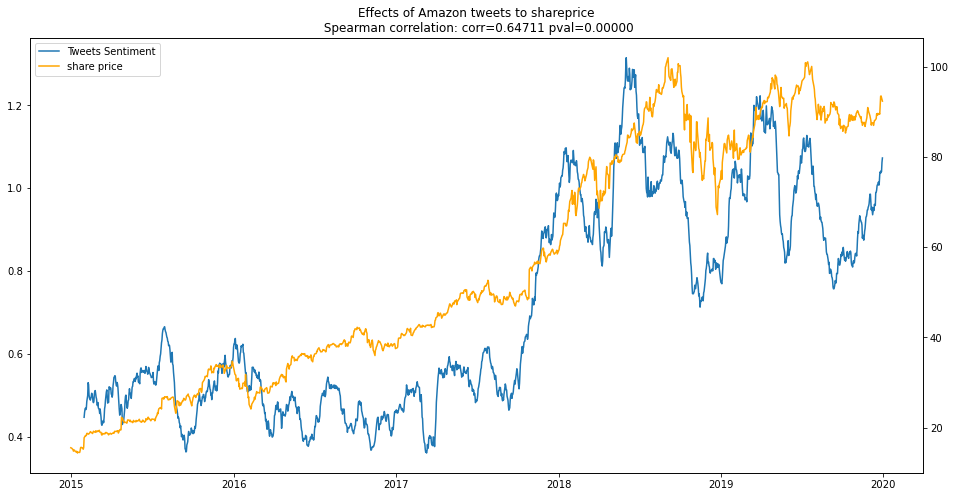

In [74]:
sentiment_overtime(amzn,amzn_stock,"Amazon");

<ipython-input-72-10d90c04481c>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


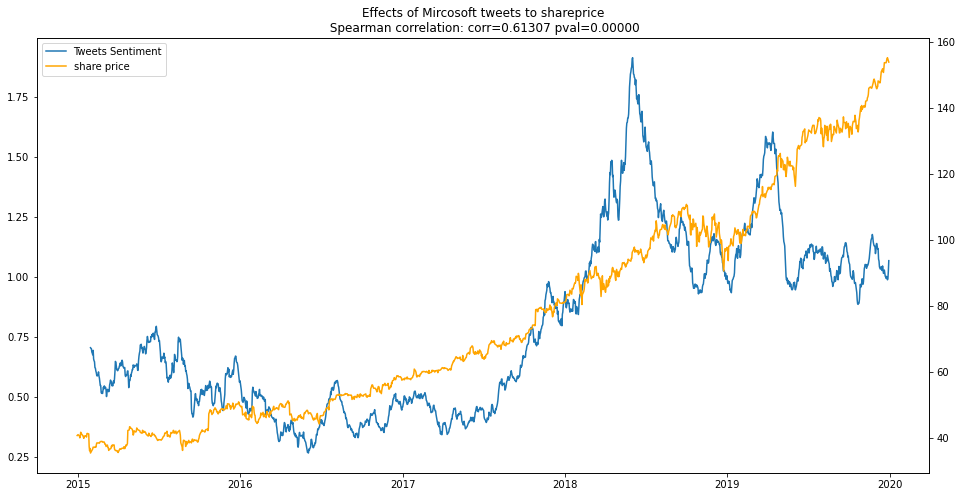

In [75]:
sentiment_overtime(msft,msft_stock,"Mircosoft");

<ipython-input-72-10d90c04481c>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


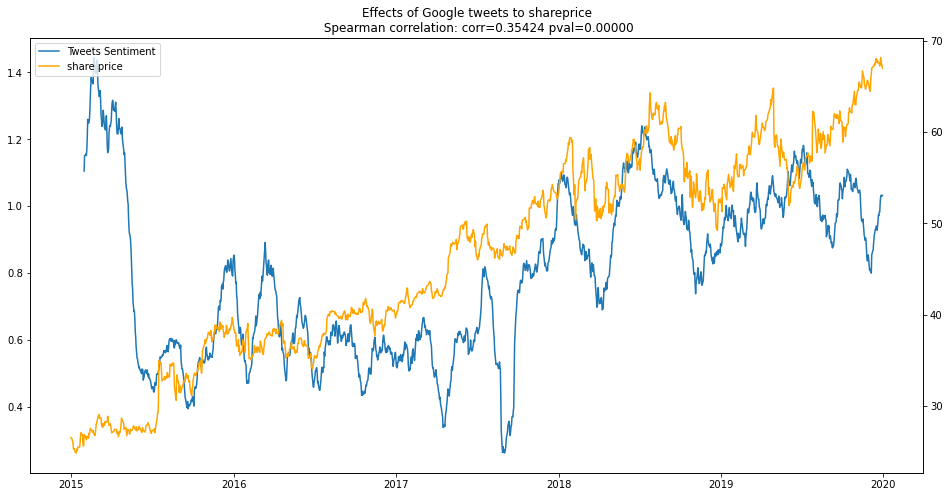

In [76]:
sentiment_overtime(googl,googl_stock,"Google");

<ipython-input-72-10d90c04481c>:8: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


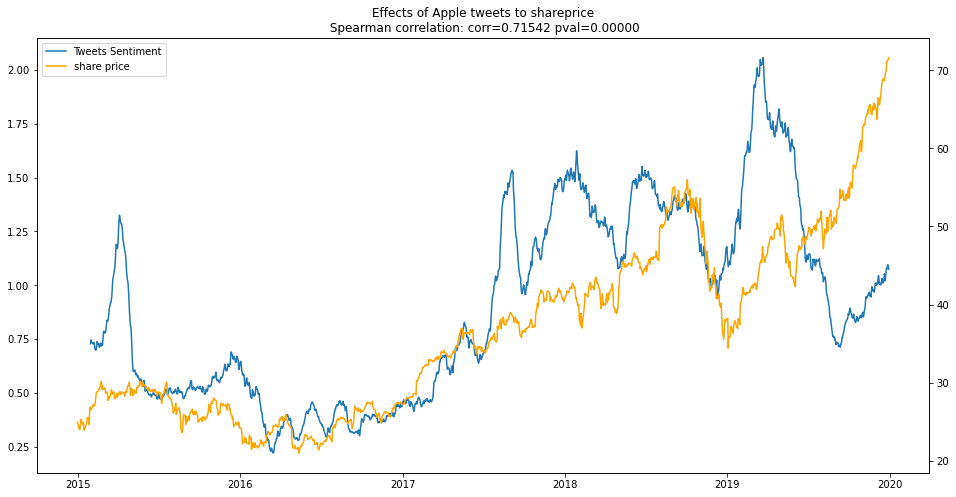

In [77]:
sentiment_overtime(aapl,aapl_stock,"Apple");